In [ ]:
def k_nn(train_X, train_y, test_X, k=1):
    preds = []
    for i in range(test_X.shape[0]):
        distances = np.sqrt(np.sum((train_X - test_X[i])**2, axis=1))
        k_nearest_labels = train_y[np.argpartition(distances, k)[:k]]
        (values, counts) = np.unique(k_nearest_labels, return_counts=True)
        most_frequent_label = values[np.argmax(counts)]
        preds.append(most_frequent_label)
    return np.array(preds)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(train_X, train_y, test_X, learning_rate=0.0001, epochs=2000):
    # Initialize parameters
    num_samples, num_features = train_X.shape
    theta = np.zeros(num_features + 1)  # add bias term

    for epoch in range(epochs):
        # Add bias term to features
        train_X_with_bias = np.c_[np.ones(num_samples), train_X]

        # Calculate predicted probabilities
        z = np.dot(train_X_with_bias, theta)
        #z = train_X_with_bias@theta
        predictions = sigmoid(z)

        # Calculate gradient
        error = predictions - train_y
        gradient = np.dot(train_X_with_bias.T, error)

        # Update parameters
        theta -= learning_rate * gradient

    # Add bias term to test features
    test_X_with_bias = np.c_[np.ones(test_X.shape[0]), test_X]

    # Calculate test predictions
    z = np.dot(test_X_with_bias, theta)
    test_predictions = sigmoid(z)
   # test_predictions = np.round(test_predictions)

    return test_predictions


Question 1

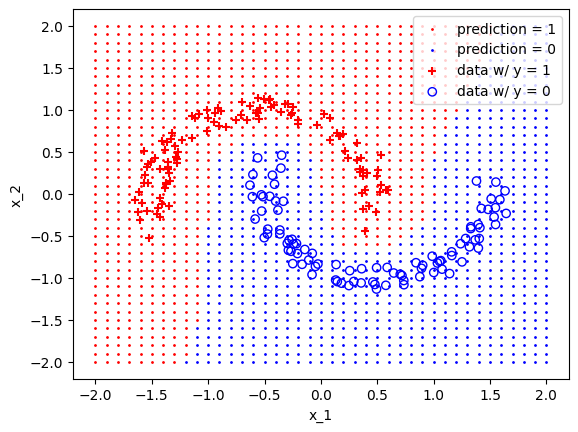

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load training data
train_data = np.loadtxt('D2z.txt')

# Split the data into input (x) and output (y)
X_train = train_data[:, :2]
y_train = train_data[:, 2]

# Define the ranges for the grid
x = np.arange(-2, 2.1, 0.1)
y = np.arange(-2, 2.1, 0.1)

# Create the grid
xx, yy = np.meshgrid(x, y)
test_points = np.c_[xx.ravel(), yy.ravel()]

# Function to compute Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Predict function for 1-NN
def predict(X_train, y_train, x_test):
    distances = [euclidean_distance(x_train, x_test) for x_train in X_train]
    nearest_neighbor = np.argmin(distances)
    return y_train[nearest_neighbor]

# Make predictions for each point in the grid
predictions = np.array([predict(X_train, y_train, grid_point) for grid_point in test_points])

# Plot settings
plt.figure()

plt.scatter(test_points[predictions == 1, 0], test_points[predictions == 1, 1], s=1, color='red')
plt.scatter(test_points[predictions == 0, 0], test_points[predictions == 0, 1], s=1, color='blue')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='+', color='red')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='o', facecolor='none', edgecolors='blue')

plt.legend(['prediction = 1', 'prediction = 0', 'data w/ y = 1', 'data w/ y = 0'])

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()


Question 2

In [ ]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('emails.csv')
print(data.head())

# Drop unwanted columns
data.drop(['Email No.'], axis=1, inplace=True)

# Separate features and labels
X = data.drop('Prediction', axis=1).values
y = data['Prediction'].values


folds = 5
num_samples = len(y)
fold_size = num_samples // folds

k = 1
for fold in range(folds):
    print(f"Fold {fold+1}")
    test_indices = list(range(fold*fold_size, (fold+1)*fold_size))
    train_indices = list(range(0, fold*fold_size)) + list(range((fold+1)*fold_size, num_samples))

    train_X, train_y = X[train_indices], y[train_indices]
    test_X, test_y = X[test_indices], y[test_indices]

    preds_y = k_nn(train_X, train_y, test_X, k)
    accuracy = np.sum(preds_y == test_y) / len(test_y)

    num_true_pos = np.sum((preds_y == 1) & (test_y == 1))
    num_pred_pos = np.sum(preds_y == 1)

    precision = num_true_pos / num_pred_pos if num_pred_pos > 0 else 0
    recall = num_true_pos / np.sum(test_y == 1)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
Fold 1
Accuracy: 0.8250, Precision: 0.6545, Recall: 0.8175
Fol

Question 3


In [ ]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('emails.csv')
print(data.head())

# Drop unwanted columns
data.drop(['Email No.'], axis=1, inplace=True)

# Separate features and labels
X = data.drop('Prediction', axis=1).values
y = data['Prediction'].values

folds = 5
num_samples = len(y)
fold_size = num_samples // folds

for fold in range(folds):
    print(f"\nFold {fold+1}")

    test_indices = list(range(fold*fold_size, (fold+1)*fold_size))
    train_indices = list(range(0, fold*fold_size)) + list(range((fold+1)*fold_size, num_samples))

    train_X, train_y = X[train_indices], y[train_indices]
    test_X, test_y = X[test_indices], y[test_indices]

    preds_y = logistic_regression(train_X, train_y, test_X)

    accuracy = np.sum(preds_y == test_y) / len(test_y)
    num_true_pos = np.sum((preds_y == 1) & (test_y == 1))
    num_pred_pos = np.sum(preds_y == 1)

    precision = num_true_pos / num_pred_pos if num_pred_pos > 0 else 0
    recall = num_true_pos / np.sum(test_y == 1)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

Fold 1


<ipython-input-30-8d2406819779>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9420, Precision: 0.9283, Recall: 0.8632

Fold 2
Accuracy: 0.9360, Precision: 0.9080, Recall: 0.8556

Fold 3
Accuracy: 0.9240, Precision: 0.9194, Recall: 0.8028

Fold 4
Accuracy: 0.9340, Precision: 0.8931, Recall: 0.8810

Fold 5
Accuracy: 0.9080, Precision: 0.8591, Recall: 0.8366


Question 4


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
Fold 1, k=1
Fold 2, k=1
Fold 3, k=1
Fold 4, k=1
Fold 5, k=1
Fo

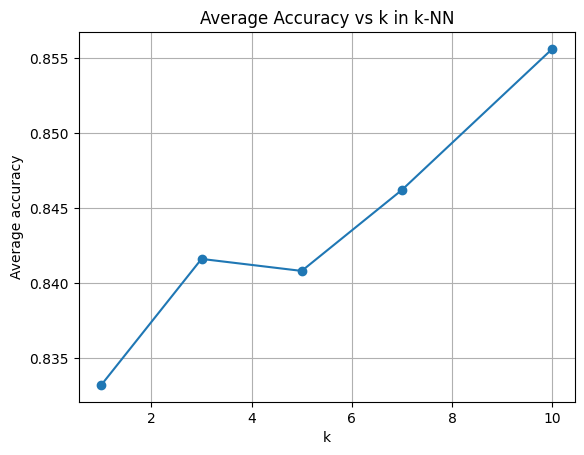

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('emails.csv')
print(data.head())

# Drop unwanted columns
data.drop(['Email No.'], axis=1, inplace=True)

# Separate features and labels
X = data.drop('Prediction', axis=1).values
y = data['Prediction'].values

folds = 5
num_samples = len(y)
fold_size = num_samples // folds

k_values = [1, 3, 5, 7, 10]
k_accuracies = {}

# Iterate over the k values
for k in k_values:
    k_accuracies[k] = []
    for fold in range(folds):
     #   print(f"Fold {fold+1}, k={k}")
        test_indices = list(range(fold*fold_size, (fold+1)*fold_size))
        train_indices = list(range(0, fold*fold_size)) + list(range((fold+1)*fold_size, num_samples))

        train_X, train_y = X[train_indices], y[train_indices]
        test_X, test_y = X[test_indices], y[test_indices]

        preds_y = k_nn(train_X, train_y, test_X, k)
        accuracy = np.sum(preds_y == test_y) / len(test_y)

        # persistent accuracy
        k_accuracies[k].append(accuracy)

# Compute average accuracy for each k
k_avg_accuracy = {k: np.mean(accs) for k, accs in k_accuracies.items()}
print(f"Average accuracy for each k: {k_avg_accuracy}")

# Plot the average accuracy versus k
plt.plot(k_values, [k_avg_accuracy[k] for k in k_values], marker='o')
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.title('Average Accuracy vs k in k-NN')
plt.grid()
plt.show()


Question 5



<ipython-input-11-367044153169>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


k-NN AUC: 0.846393456518054
Logistic Regression AUC: 0.9382028027349268


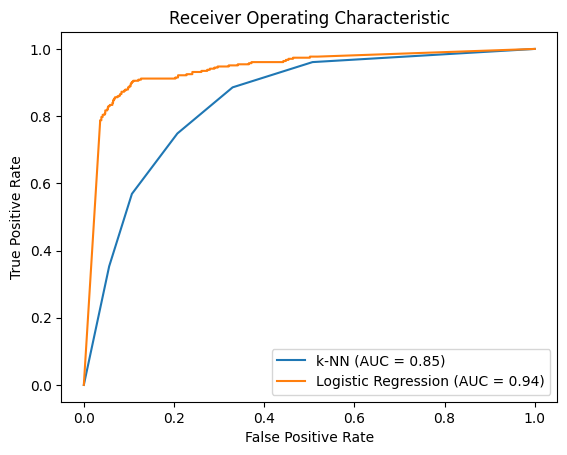

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def k_nn2(train_X, train_y, test_X, k=5):
    preds = []
    for i in range(test_X.shape[0]):
        distances = np.sqrt(np.sum((train_X - test_X[i])**2, axis=1))
        k_nearest_labels = train_y[np.argpartition(distances, k)[:k]]
        prob = np.mean(k_nearest_labels)
        preds.append(prob)
    return np.array(preds)

# Load the data
data = pd.read_csv('emails.csv')

# Drop unwanted columns
data.drop(['Email No.'], axis=1, inplace=True)

# Separate features and labels
X = data.drop('Prediction', axis=1).values
y = data['Prediction'].values

# separate training and test
train_X, train_y = X[:4000], y[:4000]
test_X, test_y = X[4000:5000], y[4000:5000]

# k-NN predictions
knn_preds = k_nn2(train_X, train_y, test_X, k=5)

knn_fpr, knn_tpr, _ = roc_curve(test_y, knn_preds)
knn_auc = auc(knn_fpr, knn_tpr)

# Logistic Regression predictions
lr_preds = logistic_regression(train_X, train_y, test_X)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_preds)
lr_auc = auc(lr_fpr, lr_tpr)

print('k-NN AUC:', knn_auc)
print('Logistic Regression AUC:', lr_auc)

# Plot ROC curves
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='k-NN (AUC = %0.2f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()